Task 1: Data Exploration and Cleaning.

1.1 Find and Download a Dataset.

We used Kaggle to find a dataset on video games, with focus on critic score and sales across different regions.

The goal is to find tendencies for succesful video game releases.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

dataframe = pd.read_csv('../Data/vgchartz-2024.csv')

1.2 Data Exploration.

To start of, we will be taking a look at the contents of our data, to have a solid background knowledge of the data before the cleaning proces.

In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


The info function provides an overview of the table's content.

The table holds 14 columns and 64.016 rows.

The dataframe contains both numerical and categorical data, judging by the datatypes, and the knowledge associated with the names of the columns.

It appears obvious that data cleaning is needed as some columns appear to have a lot of null values, and columns such as img is irrelevant for this case, as implementation of image recognition won't be included in this case.

In [34]:
dataframe.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


When running the describe function, we are provided some statistics for the numerical data.

It is worth noting that the sales numbers are represented in millions of copies sold.

Noticeably the critic_score is on a scale of 1 to 10. With an average score of 7,22 and 75% of the entries being rated above a 6,4. It will make sense to look for outliers here, as it appears from the standard deviation that the majority of the video games are rated between roughly 5,8 and 8,6.

Data cleaning will also be needed for the sales numbers, as the maximum values seem very far from the mean and standard deviation, which might be skewing the overall result. It also needs to be taken into consideration that the amount of games sold across different regions might not translate directly to succes, as we can already tell now that the bigger regions on average sell more copies. Which logically makes sense, considering a higher population, however it should also be remembered that some games might not be sold in all regions, meaning that for the sake of our experiment it would make sense to do analysis based on regional numbers, and when looking at total sales to measure succes based on if the game has been sold across multiple regions.

In [35]:
dataframe.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


With the head function a sample of the data is shown. Largely confirming previous suspecions that cleaning is needed, seeing missing values in several columns.

It is also interesting that the title show the same game can have multiple entries, as it is sold for different consoles. Grouping these entries might be necessary to judge overall succes.

1.3 Data Cleaning.

For this step missing values and outliers will be identified and dealt with appropriatly.

The considerations made as a result of the data exploration will be taken into account where applicable.

In [36]:
dataframe.isnull().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

There is a lot of columns missing a lot of values. 

First off the last_update column will be removed since more than 50% percent of the values are missing.

A more strategic approach will be used for the sales numbers, since they are of more value overall, but also seeing the total_sales being the column with the fewest amount of missing values that might be an indication that some of the missing values are only a matter of a game not being sold in that specific region. Therefore all rows with null values in both total_sales, na_sales, jp_sales, pal_sales and other_sales, will be removed. Afterwards missing values in the remaining rows in the sales columns should be replaced by a 0, overall this approach is to ensure games we have no sales data on at all is removed, while retaining games that we have sales data on, but which have regions with 0 sales.

As stated earlier the img column will also be removed.

In [37]:
cleanData = dataframe.drop(['img', 'last_update'], axis=1)

cleanData = cleanData.dropna(subset=['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales'], how='all')

cleanData['total_sales'] = cleanData['total_sales'].fillna(value=0)
cleanData['na_sales'] = cleanData['na_sales'].fillna(value=0)
cleanData['jp_sales'] = cleanData['jp_sales'].fillna(value=0)
cleanData['pal_sales'] = cleanData['pal_sales'].fillna(value=0)
cleanData['other_sales'] = cleanData['other_sales'].fillna(value=0)

cleanData.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer           4
critic_score    14796
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date       90
dtype: int64

In [38]:
cleanData.shape[0]

18922

The dataframe has now been reduced to 18.922 entries.

As for the critic_score it has to be taken into account that about 78% of the remaining data has missing values, however since this is considered a critical value for our case, imputation of data will be implemented here. There is a few different considerations - if the same title across different consoles have usable values and usage of the median or mean (based on whether the data is normally distributed or not), possibly based on genre to make sure to get as realistic values as possible.

In regards to the missing release_date and developer entries - considering it is yet unknown how impactful these columns are for the final results, they will be handled by inputting a default value instead of the missing values. For dates '1900-01-01' has been chosen, and for developer 'unknown' has been chosen for this purpose. Although since the amount of entries is so low, compared to the size of the remaining data, arguably the rows with missing values in these categories could be removed, without risk of losing to much data.

In [39]:
avg_score_per_title = cleanData.groupby('title')['critic_score'].transform('mean')
cleanData['critic_score'] = cleanData['critic_score'].fillna(value=avg_score_per_title)

cleanData['developer'] = cleanData['developer'].fillna(value='Unknown')

cleanData['release_date'] = cleanData['release_date'].fillna(value='1900-01-01')

cleanData.isnull().sum()

title               0
console             0
genre               0
publisher           0
developer           0
critic_score    13210
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date        0
dtype: int64

There is still 13.210 missing values in critic_score. So next step will be to look into whether the data is normally distributed or not, mean and median will also be plotted to determine which value represents the data best.

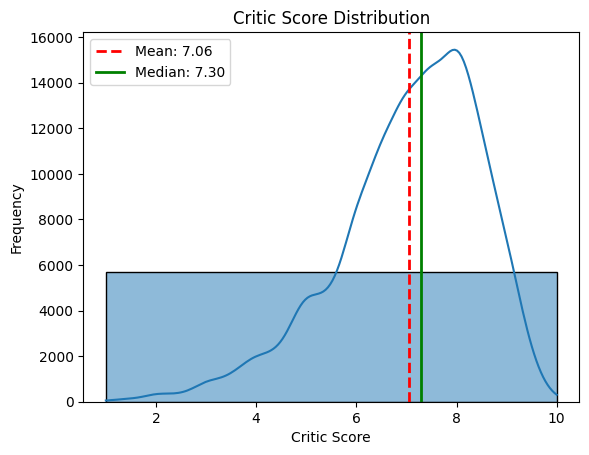

In [40]:
mean = cleanData['critic_score'].mean()
median = cleanData['critic_score'].median()

sns.histplot(data=cleanData['critic_score'].dropna(), kde=True, bins=1)

plt.axvline(mean, color='r', linestyle='--', linewidth=2, label='Mean')
plt.axvline(median, color='g', linestyle='-', linewidth=2, label='Median')

legend_elements = [
    Line2D([0], [0], color='r', linestyle='--', lw=2, label=f'Mean: {mean:.2f}'),
    Line2D([0], [0], color='g', linestyle='-', lw=2, label=f'Median: {median:.2f}'),
]
plt.legend(handles=legend_elements)

plt.title('Critic Score Distribution')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

The data seems to be negatively skewed, indicating that using the median to impute the remaining missing values is the better option, as it is less prone to outliers. However to make the data as realistic as possible the missing values will be imputed with the median of the corresponding genre.

In [41]:
median_per_genre = cleanData.groupby('genre')['critic_score'].transform('median')

cleanData['critic_score'] = cleanData['critic_score'].fillna(value=median_per_genre)

cleanData.isnull().sum()

title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64

Seeing as there is no longer any missing values, the focus will go to outliers. The goal will be to identify outliers within the sales columns (except the total_sales, logically all games sold across all regions would likely be considered outliers, but for the sake of measuring overall succes, these entries are still valid), and critic_score column. To identify outliers IQR method, and using boxplots to visualize if there is outliers outside the IQR range.

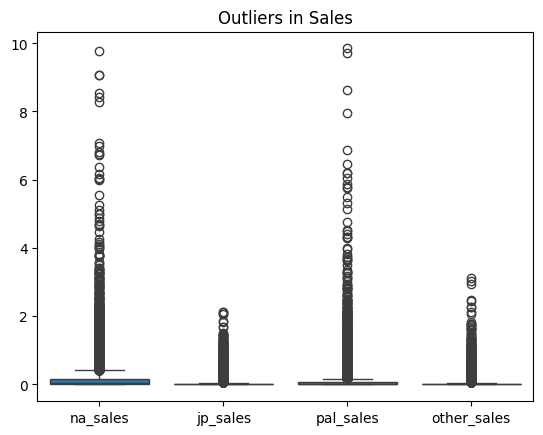

In [42]:
sns.boxplot(data=cleanData[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']])
plt.title('Outliers in Sales')
plt.show()

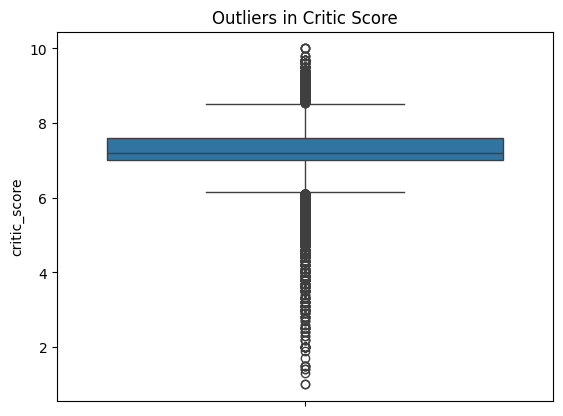

In [43]:
sns.boxplot(data=cleanData['critic_score'])
plt.title('Outliers in Critic Score')
plt.show()

The boxplots show outliers outside IQR range, as the dots outside the whiskers. All of the columns therefore have outliers to be removed.

In [45]:
outlier_columns = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'critic_score']

for column in outlier_columns:
    q1 = cleanData[column].quantile(0.25)
    q3 = cleanData[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    cleanData = cleanData[(cleanData[column] >= lower_bound) & (cleanData[column] <= upper_bound)]

cleanData.shape[0]

10378

Having removed the outliers we are left with 10.378 data entries in the dataframe without any null values and having been cleaned from outliers. The data should now be suitable for further visualization.

In [46]:
import pickle

with open('../Data/clean_data.pkl', 'wb') as insertedData:
    pickle.dump(cleanData, insertedData)

1.4 Data Visualization:

For this step the data entries remaining will be fleshed out, to provide an idea of further steps needed.

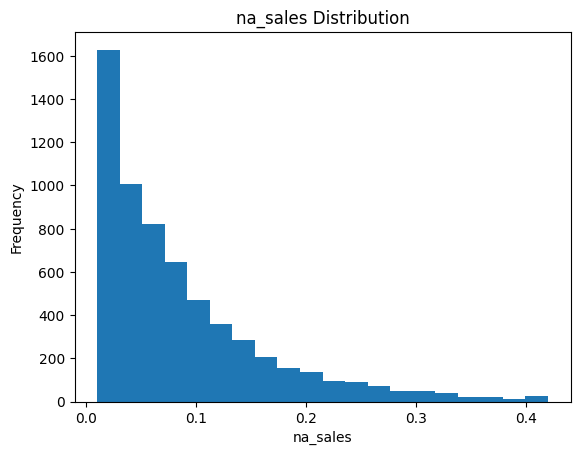

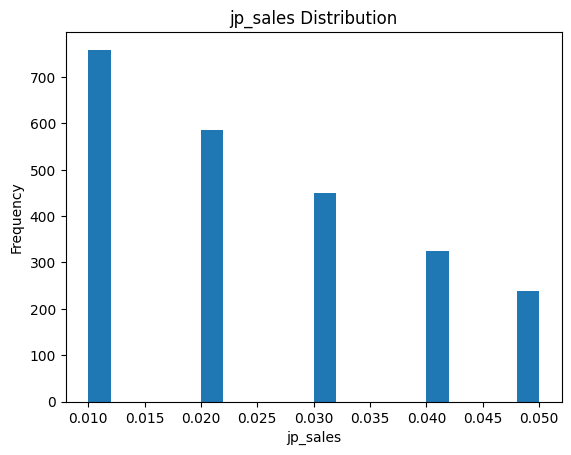

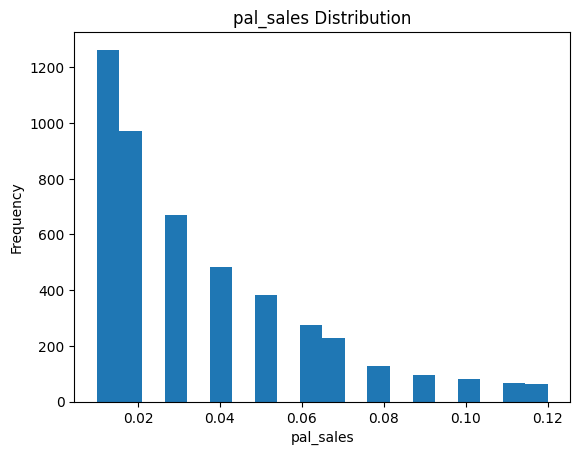

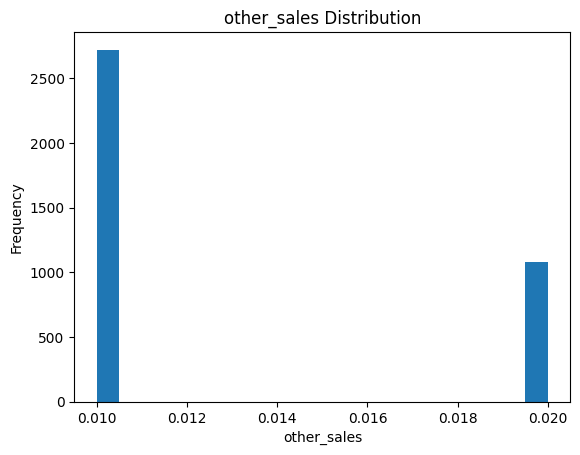

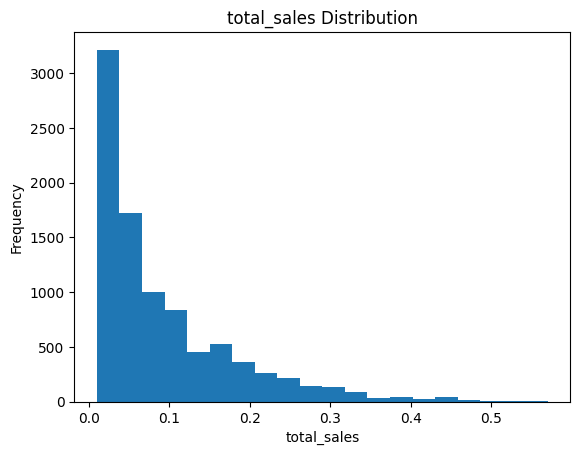

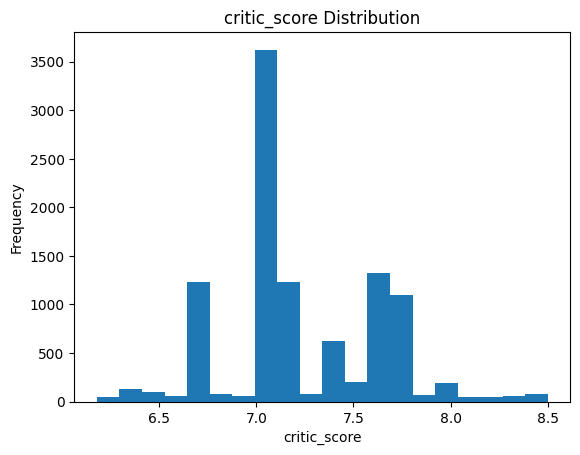

In [ ]:
columns_to_visualize = ['na_sales', 'jp_sales', 'pal_sales', 'other_sales', 'total_sales', 'critic_score']

for column in columns_to_visualize:
    cleanData[column][cleanData[column] > 0].plot(kind='hist', bins= 20)
    plt.title(column + ' Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The distribution of the different features indicate that there generally is a lot more games with lower sales, which logically makes a lot of sense. However since the values are so different across the different regions, only the total_sales will be taken into account moving forward. Although it has to be remembered that games with high sales in NA will most likely top the charts in the total sales column as well, considering NA is the biggest region, but it will allow games that are sold across all regions to hopefully be represented better. 

For good measure the categorical features genre, developer, publisher and console will also be visualized to give a better idea of whether certain categories are skewing the dataset.

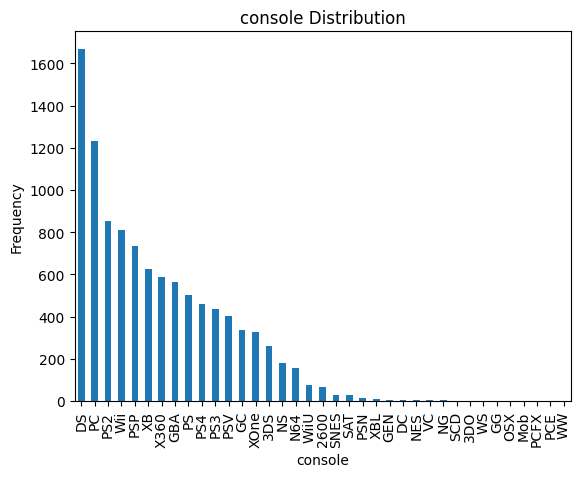

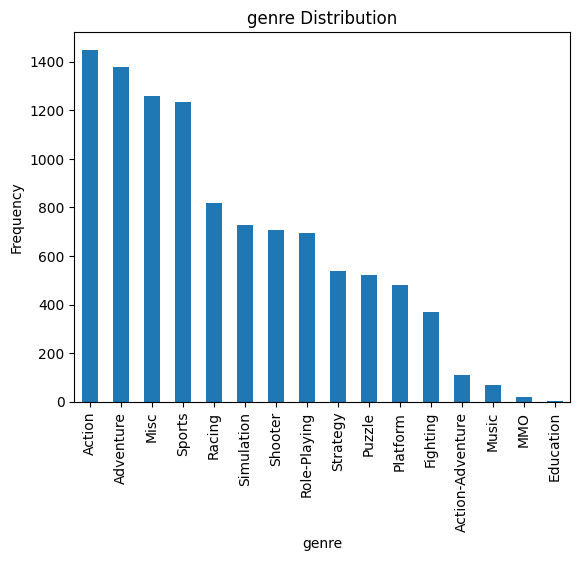

In [55]:
columns_to_visualize = ['console', 'genre']

for column in columns_to_visualize:
    cleanData[column].value_counts().plot(kind='bar')
    plt.title(column + ' Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
cleanData['publisher'].value_counts()

publisher
Ubisoft               514
Activision            489
THQ                   362
Konami                357
Electronic Arts       287
                     ... 
Illusion Softworks      1
E-Frontier              1
Digital Jesters         1
Virtual Playground      1
Enjoy Gaming ltd.       1
Name: count, Length: 656, dtype: int64

In [58]:
cleanData['developer'].value_counts()

developer
Unknown               336
Konami                175
Ubisoft               116
Capcom                112
Idea Factory          103
                     ... 
Bungie West             1
SouthPeak Games         1
Zipper Interactive      1
FuturLab                1
Burut Software          1
Name: count, Length: 2344, dtype: int64

Seeing the distribution of console gives an indication that it may be worth looking into differences in sales per region per console, and in that context look into if there is an overweight of certain genres for certain consoles. The expectation is that this shouldn't vary, but it needs to be taken into consideration.

As for the publishers and developers it seems clear that some are producing way more games than other, so it has to be taken into consideration that some publishers and developers might have a more realistic sales and critic score averages purely based on a larger sample size.